# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

df.shape

(1460, 81)

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
import numpy as np

np.log(df.SalePrice).plot.hist()

In [4]:
df['logprice'] = np.log(df.SalePrice)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

X = df.loc[:, ['LotArea']].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))

In [6]:
pd.set_option('display.max_columns', 500)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


In [7]:
features = ['LotArea', 'OverallQual']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.21981243066584194

In [8]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.18045001504174624

In [9]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.17990333103565848

In [10]:
df['fullhalfbath_interaction'] = df.FullBath * df.HalfBath

In [11]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.17941350562118036

In [12]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.178767422385055

In [13]:
df.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [14]:
df['sold_pre_2008'] = (df.YrSold < 2008)

In [15]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.17857500842915763

In [16]:
df['age_sold'] = df.YrSold - df.YearBuilt

In [17]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.16116941915293084

In [18]:
df['years_since_remod'] = df.YrSold - df.YearRemodAdd

In [19]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.1617161233871121

In [20]:
df['age_remod_interaction'] = df.age_sold * df.years_since_remod

In [21]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.16133510415182684

In [22]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.15511110951231713

In [23]:
df['floor_interaction'] = df['1stFlrSF'] * df['2ndFlrSF']

In [24]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.1548967916040169

In [25]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [26]:
df.pivot_table(index='MSZoning', values='SalePrice')

,SalePrice
MSZoning,
C (all),74528.000000
FV,214014.061538
RH,131558.375000
RL,191004.994787
RM,126316.830275


In [27]:
df['mszoning_RL'] = (df.MSZoning == 'RL')
df['mszoning_c'] = (df.MSZoning == 'C (all)')
df['mszoning_RM'] = (df.MSZoning == 'RM')
df['mszoning_FV'] = (df.MSZoning == 'FV')

In [28]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.14361104119282536

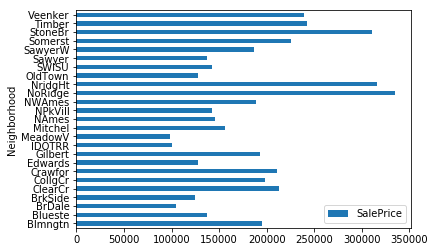

In [29]:
df.pivot_table(index='Neighborhood', values='SalePrice').plot.barh()

In [30]:
df['good_area'] = ((df.Neighborhood == 'NoRidge') | (df.Neighborhood == 'NridgeHt') | (df.Neighborhood == 'StoneBr'))
df['bad_area'] = ((df.Neighborhood == 'MeadowV') | (df.Neighborhood == 'IDOTRR') | (df.Neighborhood == 'BrDale'))

In [31]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.14186182624814414

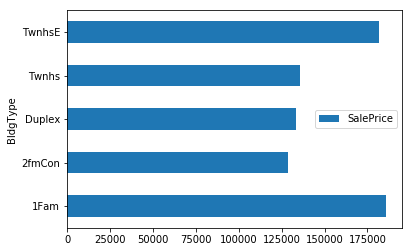

In [32]:
df.pivot_table(index='BldgType', values='SalePrice').plot.barh()

In [33]:
df['one_fam_home'] = (df.BldgType == '1Fam')
df['townhouse'] = (df.BldgType == 'TwnhsE')

In [34]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.14124045155541287

In [35]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [36]:
df.MiscFeature = df.MiscFeature.fillna('None')

In [37]:
df['miscfeature_isnone'] = (df.MiscFeature == 'None')
df['has_shed'] = (df.MiscFeature == 'Shed')

In [38]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.14109409861055675

In [39]:
df.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [40]:
df['new_home'] = (df.SaleType == 'New')

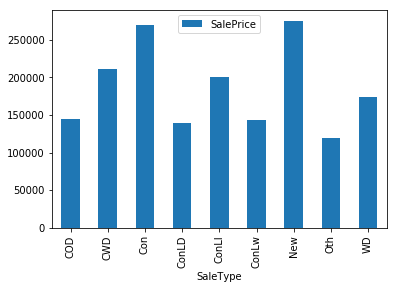

In [41]:
df.pivot_table(index='SaleType', values='SalePrice').plot.bar()

In [42]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.14100611103041533

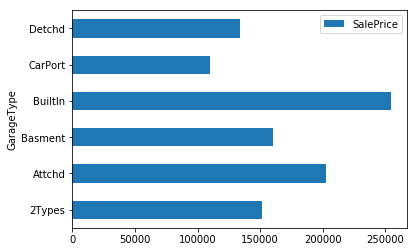

In [43]:
df.pivot_table(index='GarageType', values='SalePrice').plot.barh()

In [44]:
df['attached_garage'] = (df.GarageType == 'Attchd')
df['detchd_garage'] = (df.GarageType == 'Detchd')

In [45]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage', 'detchd_garage']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.14092730778521295

In [46]:
df['lotarea_squared'] = df.LotArea ** 2
df['overallqual_squared'] = df.OverallQual ** 2
df['overallcond_squared'] = df.OverallCond ** 2


In [47]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.13923297038242277

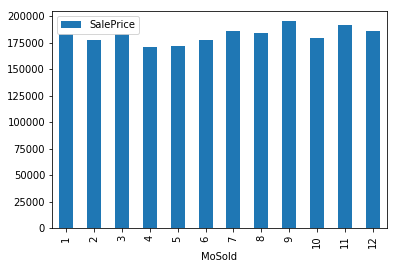

In [48]:
df.pivot_table(index='MoSold', values='SalePrice').plot.bar()

In [49]:
df['is_start_of_school'] = (df.MoSold == 9)
df['is_spring'] = ((df.MoSold == 4) | (df.MoSold == 5))

In [50]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.13965680021690977

In [51]:
df['remodeled?'] = (df.YearBuilt != df.YearRemodAdd)

In [52]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse

0.13974983028965438

In [53]:
df['age_remodeled_interaction_good'] = (df.age_sold * df['remodeled?']) 

In [54]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.13951684533779393, 0.8875894164600371)

In [55]:
df['sq_footage_fsb'] = df['1stFlrSF'] + df['2ndFlrSF'] + df.BsmtFinSF1
df['sqfootage_fsb_squared'] = df.sq_footage_fsb ** 2

In [56]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12450742968114946, 0.9104749768000295)

In [57]:
df['fullbath_squared'] = df.FullBath ** 2
df['grlivarea_squared'] = df.GrLivArea ** 2

In [58]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12521169925393477, 0.9094593254648069)

In [59]:
df.pivot_table(index='Heating', values='SalePrice')

,SalePrice
Heating,
Floor,72500.000000
GasA,182021.195378
GasW,166632.166667
Grav,75271.428571
OthW,125750.000000
Wall,92100.000000


In [60]:
df['heating_gasa'] = (df.Heating == 'GasA')

In [61]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12529362410316666, 0.9093408068636596)

In [62]:
df['bsmt_unfin_percent'] = df.BsmtUnfSF / df.TotalBsmtSF

In [63]:
df.bsmt_unfin_percent.isna().sum()

37

In [64]:
df.bsmt_unfin_percent = df.bsmt_unfin_percent.fillna(1)

In [65]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12529362410316666, 0.9093408068636596)

In [66]:
df['finished_bsmt'] = (df.bsmt_unfin_percent == 0)

In [67]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12529362410316666, 0.9093408068636596)

In [68]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [69]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [70]:
df['pos1_feedr_art'] = ((df.Condition1 == 'Feedr') | (df.Condition1 == 'Artery'))
df['pos2_feedr_art'] = ((df.Condition2 == 'Feedr') | (df.Condition2 == 'Artery'))
df['pos1_pos2_sum1'] = (df.pos1_feedr_art + df.pos2_feedr_art == 1)
df['pos1_pos2_sum2'] = (df.pos1_feedr_art + df.pos2_feedr_art == 2) 

/anaconda2/envs/py3k/lib/python3.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [71]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.1231904966299935, 0.9123587992792979)

In [72]:
df.pivot_table(index='HouseStyle', values='SalePrice')

,SalePrice
HouseStyle,
1.5Fin,143116.740260
1.5Unf,110150.000000
1Story,175985.477961
2.5Fin,220000.000000
2.5Unf,157354.545455
2Story,210051.764045
SFoyer,135074.486486
SLvl,166703.384615


In [73]:
df.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [74]:
df['onehalf_fin'] = (df.HouseStyle == '1.5Fin')
df['onehalf_unfin'] = (df.HouseStyle == '1.5Unf')


In [75]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12319750328295266, 0.9123488295339309)

In [76]:
df.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [77]:
df['kitchen_numeric'] = df.KitchenQual.map({'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [78]:
df['kitchen_numeric_squared'] = df.kitchen_numeric ** 2

In [79]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12222439315434773, 0.9137280357551938)

In [80]:
df['garage_cars_squared'] = df.GarageCars ** 2

In [81]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12182579332312339, 0.9142898207837542)

In [82]:
df.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [83]:
df['atypical_function'] = (df.Functional != 'Typ')

In [84]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12159658889106055, 0.9146120296051685)

In [85]:
df['exterior_exc'] = (df.ExterQual == 'Ex')

In [86]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.1214575540718793, 0.9148071849776018)

In [87]:
df['salecond_partial'] = (df.SaleCondition == 'Partial')

In [88]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc']
X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.1214575540718793, 0.9148071849776018)

In [89]:
df['no_fireplace'] = (df.Fireplaces == 0)
df['two_or_more_fireplaces'] = (df.Fireplaces >= 2)

In [90]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace',]

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

(0.12082772500351437, 0.9156884441196389)

In [91]:
df.LotFrontage = df.LotFrontage.fillna(0)

In [92]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

KeyError: "['lotfrontage_squared'] not in index"

In [ ]:
df.Electrical.value_counts()

In [ ]:
df.Electrical = df.Electrical.fillna('missing')

In [ ]:
df['electrical_is_brkr'] = (df.Electrical == 'SBrkr')

In [ ]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared',
            'electrical_is_brkr']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

In [ ]:
df['overallcond_5over'] = (df.OverallCond >= 5)

In [ ]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared',
            'electrical_is_brkr']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

In [ ]:
df['garagearea_squared'] = df.GarageArea ** 2

In [ ]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared',
            'electrical_is_brkr']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

In [ ]:
df['sq_footage_fsbg'] = df['sq_footage_fsb'] + df.GarageArea
df['sq_footage_fsbg_squared'] = df.sq_footage_fsbg ** 2 

In [ ]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared',
            'electrical_is_brkr']

X = df[features].values
y = df.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

In [ ]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared',
            'electrical_is_brkr']

df_outlie = df[df.SalePrice <= 700000]

X = df_outlie[features].values
y = df_outlie.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

In [ ]:
df.pivot_table(index='LandContour', values='SalePrice')

In [ ]:
df.LandContour.value_counts()

In [ ]:
df['banked_land'] = (df.LandContour == 'Bnk')
df['HLS_land'] = (df.LandContour == 'HLS_land')

In [ ]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared',
            'electrical_is_brkr', 'banked_land', 'HLS_land']

df_outlie = df[df.SalePrice <= 700000]

X = df_outlie[features].values
y = df_outlie.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

In [ ]:
df.LandSlope.value_counts()

In [ ]:
df.pivot_table(index='LandSlope', values='SalePrice')

In [ ]:
df['landslope_mod_sev'] = (df.LandSlope != 'Gtl')

In [ ]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared',
            'electrical_is_brkr', 'banked_land', 'HLS_land', 'landslope_mod_sev']

df_outlie = df[df.SalePrice <= 700000]

X = df_outlie[features].values
y = df_outlie.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

In [ ]:
df['land_interaction'] = df.HLS_land + df.landslope_mod_sev

In [ ]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared',
            'electrical_is_brkr', 'banked_land', 'HLS_land', 'landslope_mod_sev']

df_outlie = df[df.SalePrice <= 700000]

X = df_outlie[features].values
y = df_outlie.loc[:,['logprice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


features = ['LotArea', 'OverallQual', 'OverallCond', 'GrLivArea','GarageArea', 'GarageCars', 'FullBath', 'HalfBath', 'fullhalfbath_interaction', 'BedroomAbvGr',
            'sold_pre_2008', 'age_sold', 'years_since_remod', 'age_remod_interaction', '1stFlrSF', '2ndFlrSF', 'floor_interaction', 'mszoning_RL', 'mszoning_c',
            'mszoning_RM', 'mszoning_FV', 'good_area', 'bad_area', 'one_fam_home', 'townhouse', 'miscfeature_isnone', 'has_shed', 'new_home', 'attached_garage',
            'detchd_garage', 'lotarea_squared', 'overallqual_squared', 'overallcond_squared', 'is_start_of_school', 'is_spring', 'remodeled?', 'age_remodeled_interaction_good',
            'sq_footage_fsb', 'sqfootage_fsb_squared', 'fullbath_squared', 'grlivarea_squared', 'heating_gasa', 'pos1_feedr_art', 'pos2_feedr_art', 'pos1_pos2_sum1', 'pos1_pos2_sum2',
            'onehalf_fin', 'onehalf_unfin','kitchen_numeric_squared', 'garage_cars_squared', 'atypical_function', 'exterior_exc', 'no_fireplace', 'LotFrontage', 'lotfrontage_squared',
            'electrical_is_brkr', 'banked_land', 'HLS_land', 'landslope_mod_sev']


X = df[features].values
y = df.logprice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


lr = Ridge()
lr.fit(X_train, y_train)


oos_pred = lr.predict(X_test)
oos_mse = mean_squared_error(y_test, oos_pred)
oos_r2 = r2_score(y_test, oos_pred)
rmse = (np.sqrt(oos_mse))
rmse, oos_r2

In [94]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logprice,fullhalfbath_interaction,sold_pre_2008,age_sold,years_since_remod,age_remod_interaction,floor_interaction,mszoning_RL,mszoning_c,mszoning_RM,mszoning_FV,good_area,bad_area,one_fam_home,townhouse,miscfeature_isnone,has_shed,new_home,attached_garage,detchd_garage,lotarea_squared,overallqual_squared,overallcond_squared,is_start_of_school,is_spring,remodeled?,age_remodeled_interaction_good,sq_footage_fsb,sqfootage_fsb_squared,fullbath_squared,grlivarea_squared,heating_gasa,bsmt_unfin_percent,finished_bsmt,pos1_feedr_art,pos2_feedr_art,pos1_pos2_sum1,pos1_pos2_sum2,onehalf_fin,onehalf_unfin,kitchen_numeric,kitchen_numeric_squared,garage_cars_squared,atypical_function,exterior_exc,salecond_partial,no_fireplace,two_or_more_fireplaces
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,None,0,2,2008,WD,Normal,208500,12.247694,2,False,5,5,25,731024,True,False,False,False,False,False,True,False,True,False,False,True,False,71402500,49,25,False,False,False,0,2416,5837056,4,2924100,True,0.175234,False,False,False,False,False,False,False,4,16,4,False,False,False,True,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,None,0,5,2007,WD,Normal,181500,12.109011,0,True,31,31,961,0,True,False,False,False,False,False,True,False,True,False,False,True,False,92160000,36,64,False,True,False,0,2240,5017600,4,1592644,True,0.225040,False,True,False,True,False,False,False,3,9,4,False,False,False,False,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,None,0,9,2008,WD,Normal,223500,12.317167,2,False,7,6,42,796720,True,False,False,False,False,False,True,False,True,False,False,True,False,126562500,49,25,True,False,True,7,2272,5161984,4,3189796,True,0.471739,False,False,False,False,False,False,False,4,16,4,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,None,0,2,2006,WD,Abnorml,140000,11.849398,0,True,91,36,3276,726516,True,False,False,False,False,False,True,False,True,False,False,False,True,91202500,49,25,False,False,True,91,1933,3736489,1,2948089,True,0.714286,False,False,False,False,False,False,False,4,16,9,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1

In [100]:
df['YrSold'].min()

2006

In [101]:
df['Mo'] = 12 * (df['YrSold'] - 2006) + df['MoSold']

In [105]:
df.shape

(1460, 130)

In [106]:
def moving_avg_homes_sold (x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


In [174]:
df[df['Mo']==1].shape[0]

10

In [175]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logprice,fullhalfbath_interaction,sold_pre_2008,age_sold,years_since_remod,age_remod_interaction,floor_interaction,mszoning_RL,mszoning_c,mszoning_RM,mszoning_FV,good_area,bad_area,one_fam_home,townhouse,miscfeature_isnone,has_shed,new_home,attached_garage,detchd_garage,lotarea_squared,overallqual_squared,overallcond_squared,is_start_of_school,is_spring,remodeled?,age_remodeled_interaction_good,sq_footage_fsb,sqfootage_fsb_squared,fullbath_squared,grlivarea_squared,heating_gasa,bsmt_unfin_percent,finished_bsmt,pos1_feedr_art,pos2_feedr_art,pos1_pos2_sum1,pos1_pos2_sum2,onehalf_fin,onehalf_unfin,kitchen_numeric,kitchen_numeric_squared,garage_cars_squared,atypical_function,exterior_exc,salecond_partial,no_fireplace,two_or_more_fireplaces,Mo,Sold_this_Mo
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,None,0,2,2008,WD,Normal,208500,12.247694,2,False,5,5,25,731024,True,False,False,False,False,False,True,False,True,False,False,True,False,71402500,49,25,False,False,False,0,2416,5837056,4,2924100,True,0.175234,False,False,False,False,False,False,False,4,16,4,False,False,False,True,False,26,10
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,None,0,5,2007,WD,Normal,181500,12.109011,0,True,31,31,961,0,True,False,False,False,False,False,True,False,True,False,False,True,False,92160000,36,64,False,True,False,0,2240,5017600,4,1592644,True,0.225040,False,True,False,True,False,False,False,3,9,4,False,False,False,False,False,17,10
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,None,0,9,2008,WD,Normal,223500,12.317167,2,False,7,6,42,796720,True,False,False,False,False,False,True,False,True,False,False,True,False,126562500,49,25,True,False,True,7,2272,5161984,4,3189796,True,0.471739,False,False,False,False,False,False,False,4,16,4,False,False,False,False,False,33,10
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,None,0,2,2006,WD,Abnorml,140000,11.849398,0,True,91,36,3276,726516,True,False,False,False,False,False,True,False,True,False,False,False,True,91202500,49,25,False,False,True,91,1933,3736489,1,2948089,True,0.714286,False,False,False,False,False,False,False,4,16,9,False,False,False,False,False,2,10
4,5,60,RL,84.0,14260,Pave,NaN,IR1

In [199]:
homes_sold_by_Mo =[]
for i in range (1,56):
    homes_sold_by_Mo.append(df[df['Mo']==i].shape[0])

In [200]:
homes_sold_by_Mo

[10,
 9,
 25,
 27,
 38,
 48,
 67,
 23,
 15,
 24,
 16,
 12,
 13,
 8,
 23,
 23,
 43,
 59,
 51,
 40,
 11,
 16,
 24,
 18,
 13,
 10,
 18,
 26,
 38,
 51,
 49,
 29,
 17,
 22,
 17,
 14,
 12,
 10,
 19,
 26,
 37,
 59,
 61,
 30,
 20,
 27,
 22,
 15,
 10,
 15,
 21,
 39,
 48,
 36,
 6]

In [201]:
dict_df = pd.DataFrame(homes_sold_by_Mo)

In [202]:
dict_df

,0
0,10
1,9
2,25
3,27
4,38
5,48
6,67
7,23
8,15
9,24


In [205]:
dict_df['Mo_num']=dict_df[0]+1

In [206]:
dict_df

,0,Mo_num
0,10,1
1,9,2
2,25,3
3,27,4
4,38,5
5,48,6
6,67,7
7,23,8
8,15,9
9,24,10


In [212]:
dict_df.columns=['Homes_sold', 'Mo']

In [220]:
dict_df['term n-1'] = dict_df['Mo']-1
dict_df['term n-2'] = dict_df['Mo']-2
dict_df['term n-3'] = dict_df['Mo']-3
dict_df['term n-4'] = dict_df['Mo']-4
dict_df['term n-5'] = dict_df['Mo']-5
dict_df['term n-6'] = dict_df['Mo']-6

In [236]:
dict_df['three_mo_MA'] = df['Homes_sold'].iloc[dict_df.index - 1], [dict_df[0]]

dict_df

KeyError: 0

In [216]:
test_merge = pd.merge(df, dict_df, 'right', on='Mo')

In [217]:
test_merge

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logprice,fullhalfbath_interaction,sold_pre_2008,age_sold,years_since_remod,age_remod_interaction,floor_interaction,mszoning_RL,mszoning_c,mszoning_RM,mszoning_FV,good_area,bad_area,one_fam_home,townhouse,miscfeature_isnone,has_shed,new_home,attached_garage,detchd_garage,lotarea_squared,overallqual_squared,overallcond_squared,is_start_of_school,is_spring,remodeled?,age_remodeled_interaction_good,sq_footage_fsb,sqfootage_fsb_squared,fullbath_squared,grlivarea_squared,heating_gasa,bsmt_unfin_percent,finished_bsmt,pos1_feedr_art,pos2_feedr_art,pos1_pos2_sum1,pos1_pos2_sum2,onehalf_fin,onehalf_unfin,kitchen_numeric,kitchen_numeric_squared,garage_cars_squared,atypical_function,exterior_exc,salecond_partial,no_fireplace,two_or_more_fireplaces,Mo,Sold_this_Mo,Homes_sold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,None,0,2,2008,WD,Normal,208500,12.247694,2,False,5,5,25,731024,True,False,False,False,False,False,True,False,True,False,False,True,False,71402500,49,25,False,False,False,0,2416,5837056,4,2924100,True,0.175234,False,False,False,False,False,False,False,4,16,4,False,False,False,True,False,26,10,10
1,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,None,0,2,2008,WD,Normal,129500,11.771436,0,False,43,43,1849,0,True,False,False,False,False,False,True,False,True,False,False,False,True,125440000,25,25,False,False,False,0,1946,3786916,1,1081600,True,0.128846,False,False,False,False,False,False,False,3,9,1,False,False,False,True,False,26,10,10
2,202,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,641,LwQ,279,276,1196,GasA,TA,Y,SBrkr,1279,0,0,1279,0,1,2,0,3,1,TA,6,Typ,2,Fa,Detchd,1980.0,Unf,2,473,TA,TA,Y,238,83,0,0,0,0,NaN,MnPrv,None,0,2,2008,WD,Normal,171500,12.052339,0,False,31,31,961,0,True,False,False,False,False,False,True,False,True,False,False,False,True,102515625,36,36,False,False,False,0,1920,3686400,4,1635841,True,0.230769,False,False,False,False,False,False,False,3,9,4,False,False,False,False,True,26,10,10
3,269,30,RM,71.0,6900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,6,1940,1955,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,403,Rec,125,212,740,GasA,Ex,Y,SBrkr,778,0,0,778,0,0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1966.0,Fin,1,924,Ex,Ex,Y,0,25,0,0,0,0,NaN,NaN,None,0,2,2008,WD,Normal,120500,11.699405,0,False,68,53,3604,0,False,False,True,False,False,True,True,False,True,False,False,False,True,47610000,25,36,False,False,True,68,1181,1394761,1,605284,True,0.286486,False,False,False,False,False,False,False,3,9,1,False,False,False,False,False,26,10,10
4,423,20,RL,

In [218]:
df = test_merge.drop('Sold_this_Mo', axis=1)

In [219]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logprice,fullhalfbath_interaction,sold_pre_2008,age_sold,years_since_remod,age_remod_interaction,floor_interaction,mszoning_RL,mszoning_c,mszoning_RM,mszoning_FV,good_area,bad_area,one_fam_home,townhouse,miscfeature_isnone,has_shed,new_home,attached_garage,detchd_garage,lotarea_squared,overallqual_squared,overallcond_squared,is_start_of_school,is_spring,remodeled?,age_remodeled_interaction_good,sq_footage_fsb,sqfootage_fsb_squared,fullbath_squared,grlivarea_squared,heating_gasa,bsmt_unfin_percent,finished_bsmt,pos1_feedr_art,pos2_feedr_art,pos1_pos2_sum1,pos1_pos2_sum2,onehalf_fin,onehalf_unfin,kitchen_numeric,kitchen_numeric_squared,garage_cars_squared,atypical_function,exterior_exc,salecond_partial,no_fireplace,two_or_more_fireplaces,Mo,Homes_sold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,None,0,2,2008,WD,Normal,208500,12.247694,2,False,5,5,25,731024,True,False,False,False,False,False,True,False,True,False,False,True,False,71402500,49,25,False,False,False,0,2416,5837056,4,2924100,True,0.175234,False,False,False,False,False,False,False,4,16,4,False,False,False,True,False,26,10
1,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,None,0,2,2008,WD,Normal,129500,11.771436,0,False,43,43,1849,0,True,False,False,False,False,False,True,False,True,False,False,False,True,125440000,25,25,False,False,False,0,1946,3786916,1,1081600,True,0.128846,False,False,False,False,False,False,False,3,9,1,False,False,False,True,False,26,10
2,202,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,641,LwQ,279,276,1196,GasA,TA,Y,SBrkr,1279,0,0,1279,0,1,2,0,3,1,TA,6,Typ,2,Fa,Detchd,1980.0,Unf,2,473,TA,TA,Y,238,83,0,0,0,0,NaN,MnPrv,None,0,2,2008,WD,Normal,171500,12.052339,0,False,31,31,961,0,True,False,False,False,False,False,True,False,True,False,False,False,True,102515625,36,36,False,False,False,0,1920,3686400,4,1635841,True,0.230769,False,False,False,False,False,False,False,3,9,4,False,False,False,False,True,26,10
3,269,30,RM,71.0,6900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,6,1940,1955,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,403,Rec,125,212,740,GasA,Ex,Y,SBrkr,778,0,0,778,0,0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1966.0,Fin,1,924,Ex,Ex,Y,0,25,0,0,0,0,NaN,NaN,None,0,2,2008,WD,Normal,120500,11.699405,0,False,68,53,3604,0,False,False,True,False,False,True,True,False,True,False,False,False,True,47610000,25,36,False,False,True,68,1181,1394761,1,605284,True,0.286486,False,False,False,False,False,False,False,3,9,1,False,False,False,False,False,26,10
4,423,20,RL,100.0,21750,Pave,NaN,Reg,